## Zbiór steps-small

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from NeuralNetwork.NeuralNetwork import Net, mse
from NeuralNetwork.Layers import DenseNetLayer
from NeuralNetwork.ActivationFunctions import SigmoidFunction, LinearFunction
from NeuralNetwork.Initializers import RandomNormalInitializer
from NeuralNetwork.Optimizers import SGD

In [3]:
df = pd.read_csv("./data/regression/steps-small-training.csv", index_col=0)
X = df.x.to_numpy()
X = np.transpose(np.array([X]))
Y = df.y.to_numpy()
Y = np.transpose(np.array([Y]))

df1 = pd.read_csv("./data/regression/steps-small-test.csv", index_col=0)
X1 = df1.x.to_numpy()
X1 = np.transpose(np.array([X1]))
Y1 = df1.y.to_numpy()
Y1 = np.transpose(np.array([Y1]))

In [4]:
n = Net(optimizer = SGD(learning_rate=0.0001))
n.add_layer(DenseNetLayer(1, 5, SigmoidFunction(), RandomNormalInitializer()))
n.add_layer(DenseNetLayer(5, 5, SigmoidFunction(), RandomNormalInitializer()))
n.add_layer(DenseNetLayer(5, 1, LinearFunction(), RandomNormalInitializer()))
n.train(X, Y, X1, Y1, 5000, 100)

Epoch: 0, mse train: 6515.533602995065, mse eval: 8053.125672712368
Epoch: 100, mse train: 1538.7604098342313, mse eval: 1914.647777381985
Epoch: 200, mse train: 606.8779985155907, mse eval: 644.5641712357464
Epoch: 300, mse train: 421.6435268467643, mse eval: 368.978739812147
Epoch: 400, mse train: 316.8858852501856, mse eval: 235.1017368749482
Epoch: 500, mse train: 272.4642825853228, mse eval: 184.07125167899733
Epoch: 600, mse train: 243.8071273798516, mse eval: 155.78377842667823
Epoch: 700, mse train: 219.414146527321, mse eval: 134.68656780821158
Epoch: 800, mse train: 197.4366567348755, mse eval: 117.81544648373462
Epoch: 900, mse train: 177.7105053415648, mse eval: 105.25980502911898
Epoch: 1000, mse train: 160.20991334387762, mse eval: 96.9390610880054
Epoch: 1100, mse train: 144.78193516148676, mse eval: 90.87219537127214
Epoch: 1200, mse train: 131.2041166187351, mse eval: 84.55637202355092
Epoch: 1300, mse train: 119.26793027939674, mse eval: 77.3052740630756
Epoch: 1400, 

In [5]:
n.train(X, Y, X1, Y1, 200, 100)

Epoch: 0, mse train: 5.491350728601356, mse eval: 4.252614255863252
Epoch: 100, mse train: 5.218338270173448, mse eval: 4.0859710568387655
Training result:
    mse train: 4.981705201326585
    mse eval: 3.944671395479531


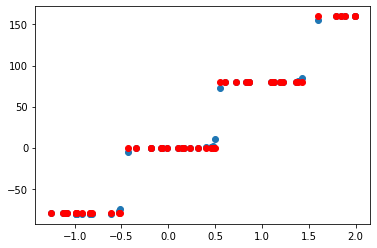

In [7]:
plt.scatter(X, n.forward(X))
plt.scatter(X, Y, color='red')
plt.show()

### Wizualizacja zbioru testowego i predykcji na zbiorze testowym

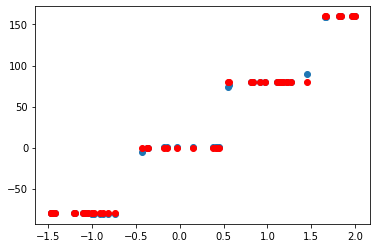

In [8]:
plt.scatter(X1, n.forward(X1))
plt.scatter(X1, Y1, color='red')
plt.show()

In [9]:
print(f"MSE na zbiorze testowym wynosi: {mse(Y1, n.forward(X1))}")

MSE na zbiorze testowym wynosi: 3.944671395479531
